Debugging how SMARTS should look like can be quite challenging. THis is why I developed these fragmeneter_utils. On another note, it always helps to have a look on how rdkit implements the properties, sometimes things are unfortunately not so easy to grasp. I have opened several issues thinking they were bugs that turned out to be hard chemically to solve or design decisions. Especially, I think aromaticity is hard. (At least for me)
You can get more info from here: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

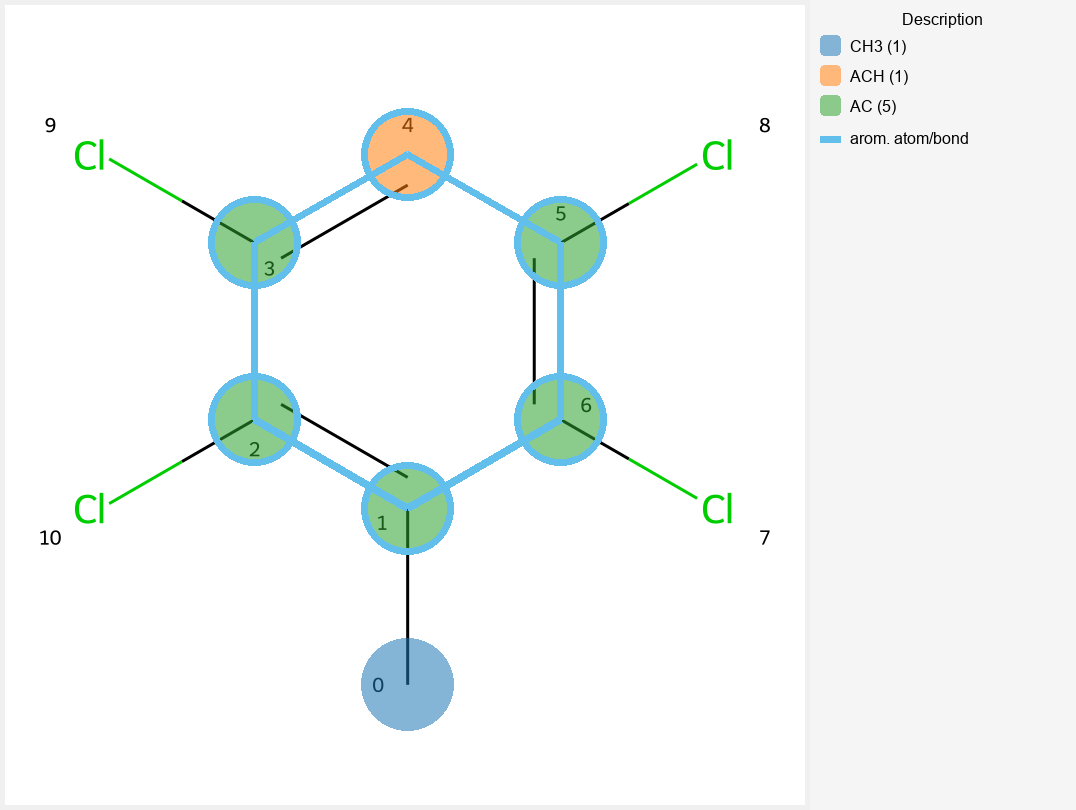

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
2   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
3   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
4   | C [6]   | 0      | a      | 2      | 1       | 1        | 1        | (6,)    | 4      | 3      | 2        | ✘   

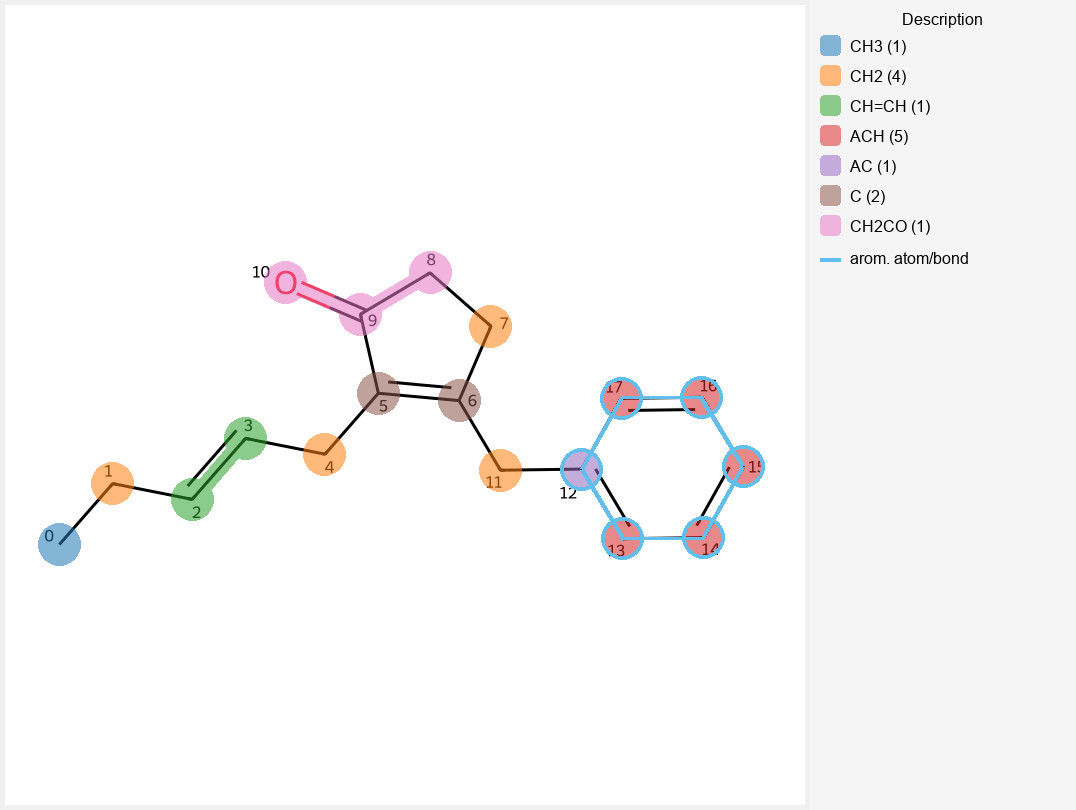

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘     |    
2   | C [6]   | 0      | A      | 2      | 1       | 1        | 0        |         | 4      | 3      | 0        | ✘     |    
3   | C [6]   | 0      | A      | 2      | 1       | 1        | 0        |         | 4      | 3      | 0        | ✘     |    
4   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘   

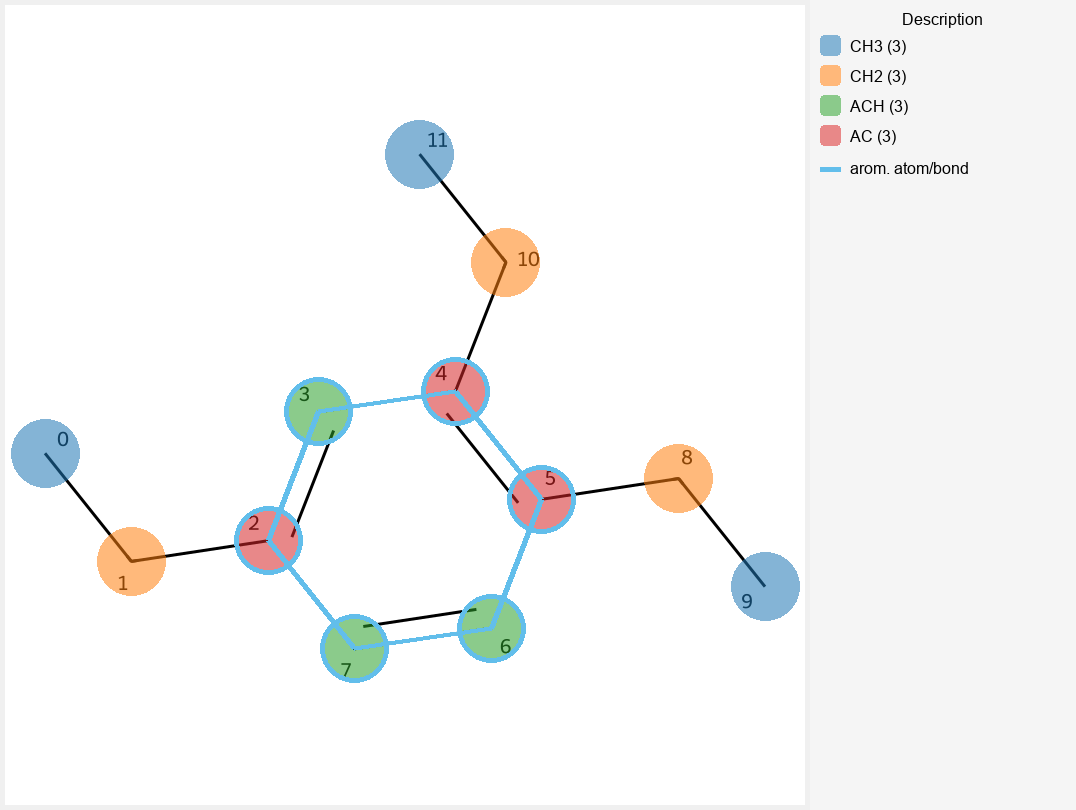

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘     |    
2   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
3   | C [6]   | 0      | a      | 2      | 1       | 1        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
4   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘   

In [ ]:
from IPython.display import display

from fragmenter import fragmenter
from fragmenter_utils import draw_mol_with_highlights_and_legend, get_table_with_atom_properties_relevant_to_SMARTS
from rdkit import Chem
import SMARTS

UNIFAC_SMARTS = SMARTS.UNIFAC.copy()

fragmentation_scheme = {i+1: j[1] for i, j in enumerate(UNIFAC_SMARTS)}
simple_fragmenter = fragmenter(fragmentation_scheme, algorithm='simple')

group_names = {k+1:v[0] for k,v  in enumerate(UNIFAC_SMARTS)}
for i, SMILES in enumerate(['CC1=C(C(=CC(=C1Cl)Cl)Cl)Cl', 'CCC=CCC1=C(CCC1=O)Cc1ccccc1', 'CCC1=CC(=C(C=C1)CC)CC']):
        mol = Chem.MolFromSmiles(SMILES)
        fragmentation, success, fragmentation_matches = simple_fragmenter.fragment(mol)
        img = draw_mol_with_highlights_and_legend(mol, fragmentation_matches, group_names)
        _, _, _, formatted_rows = get_table_with_atom_properties_relevant_to_SMARTS(mol)
        display(img)
        print('\n'.join(formatted_rows))
        